# Import Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier,plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
data = pd.read_csv('C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Decision Trees/Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info() # data has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


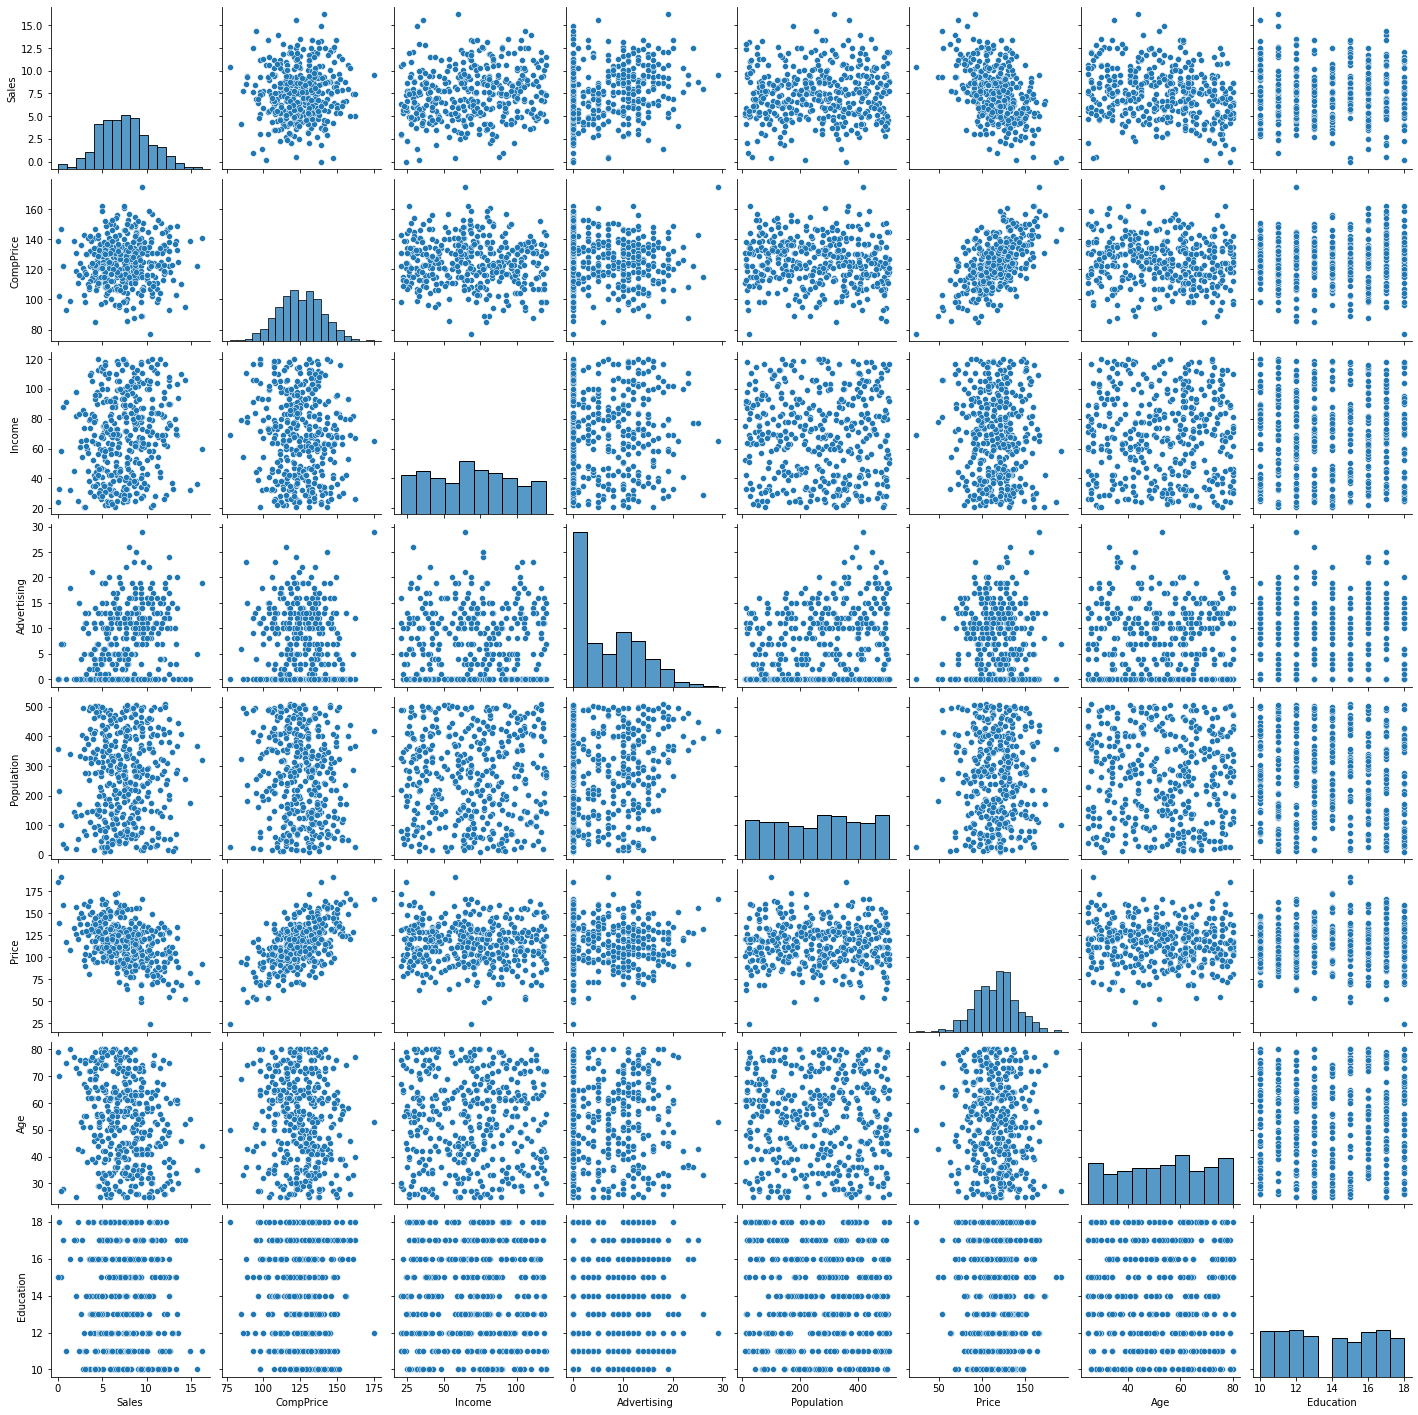

In [4]:
sns.pairplot(data)

<AxesSubplot:xlabel='Sales'>

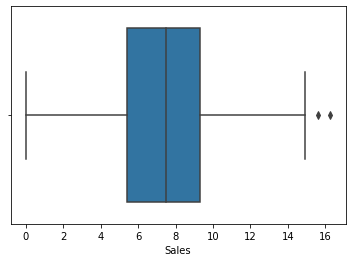

In [5]:
sns.boxplot(data.Sales)

<AxesSubplot:xlabel='CompPrice'>

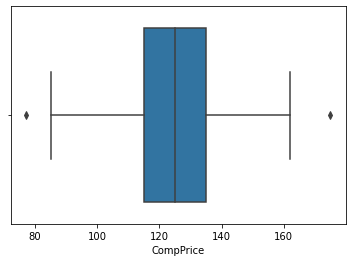

In [6]:
sns.boxplot(data.CompPrice)

<AxesSubplot:xlabel='Price'>

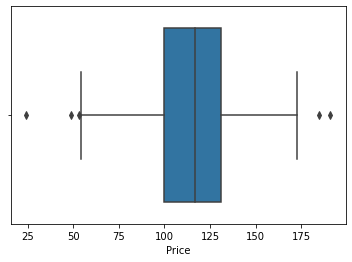

In [7]:
sns.boxplot(data.Price)

### It is clear that some of columns have continous data, we need to convert them in categorical. And can also remove outliers if required

In [8]:
label_encoder = preprocessing.LabelEncoder()

In [9]:
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# Selecting our Features and Target variables
### After looking at the problem statement it can be deduced that Sales is our target

In [10]:
Y=data['Sales']
X=data.iloc[:,1:11]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [11]:
Y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [12]:
# array = data.values
x = X.values
y = Y.values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

## We have continous data in our Target column, so we will go ahead with DecisionTreeRegressor()

In [14]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [15]:
#Find the accuracy
model.score(x_test,y_test)

0.29445365240418

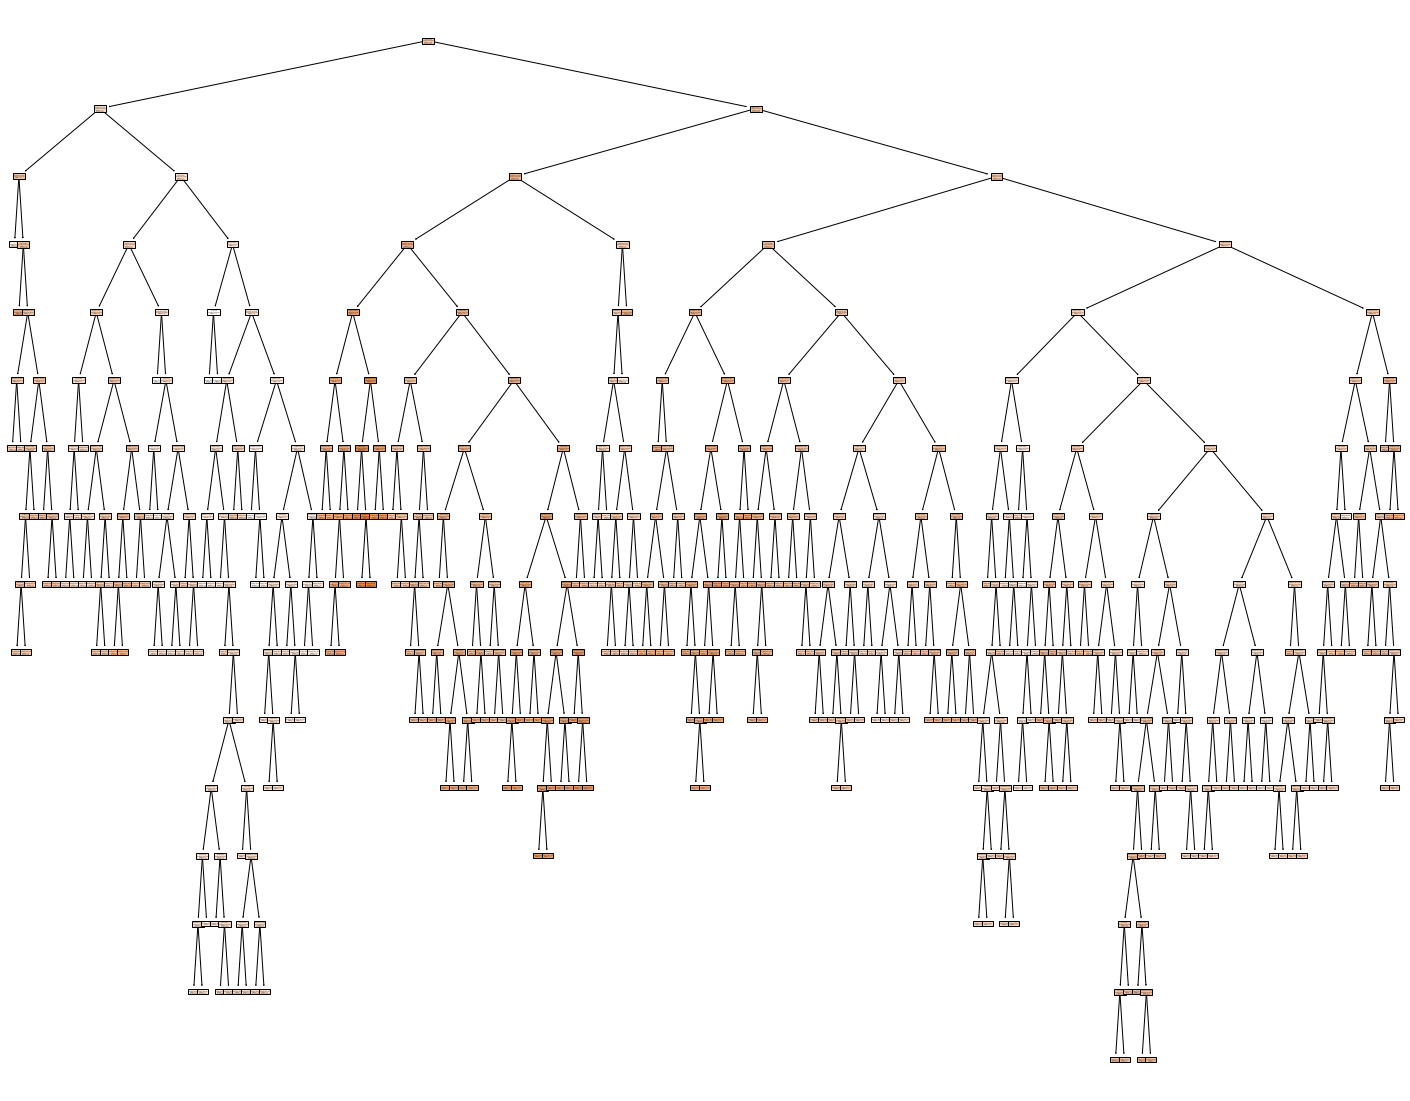

In [16]:
fn=['Sales','CompPrice','Income' ,'Advertising' ,'Population' ,'Price' ,'Age' ,'Education' ,'Urban','US']
cn =['Bad','Good','Medium']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=fn, filled=True)


### Accuracy for base model is very low as well as depth of the decision tree is also very high, let us try Hyperparameter tuning

# Grid Search for Algorithm Tuning

In [17]:
parameters = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
          'splitter' : ['best', 'random'],
          'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
          'max_features' : ['sqrt','log2','auto']}


In [18]:
model = DecisionTreeRegressor()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']})

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.43482464736010346
{'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'auto', 'splitter': 'best'}


## Applying Best parameters

In [39]:
model = DecisionTreeRegressor(criterion='absolute_error', max_depth = 7, max_features = 'auto', splitter = 'best')
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [40]:
#Find the accuracy
model.score(x_test,y_test)

0.28078968680785465

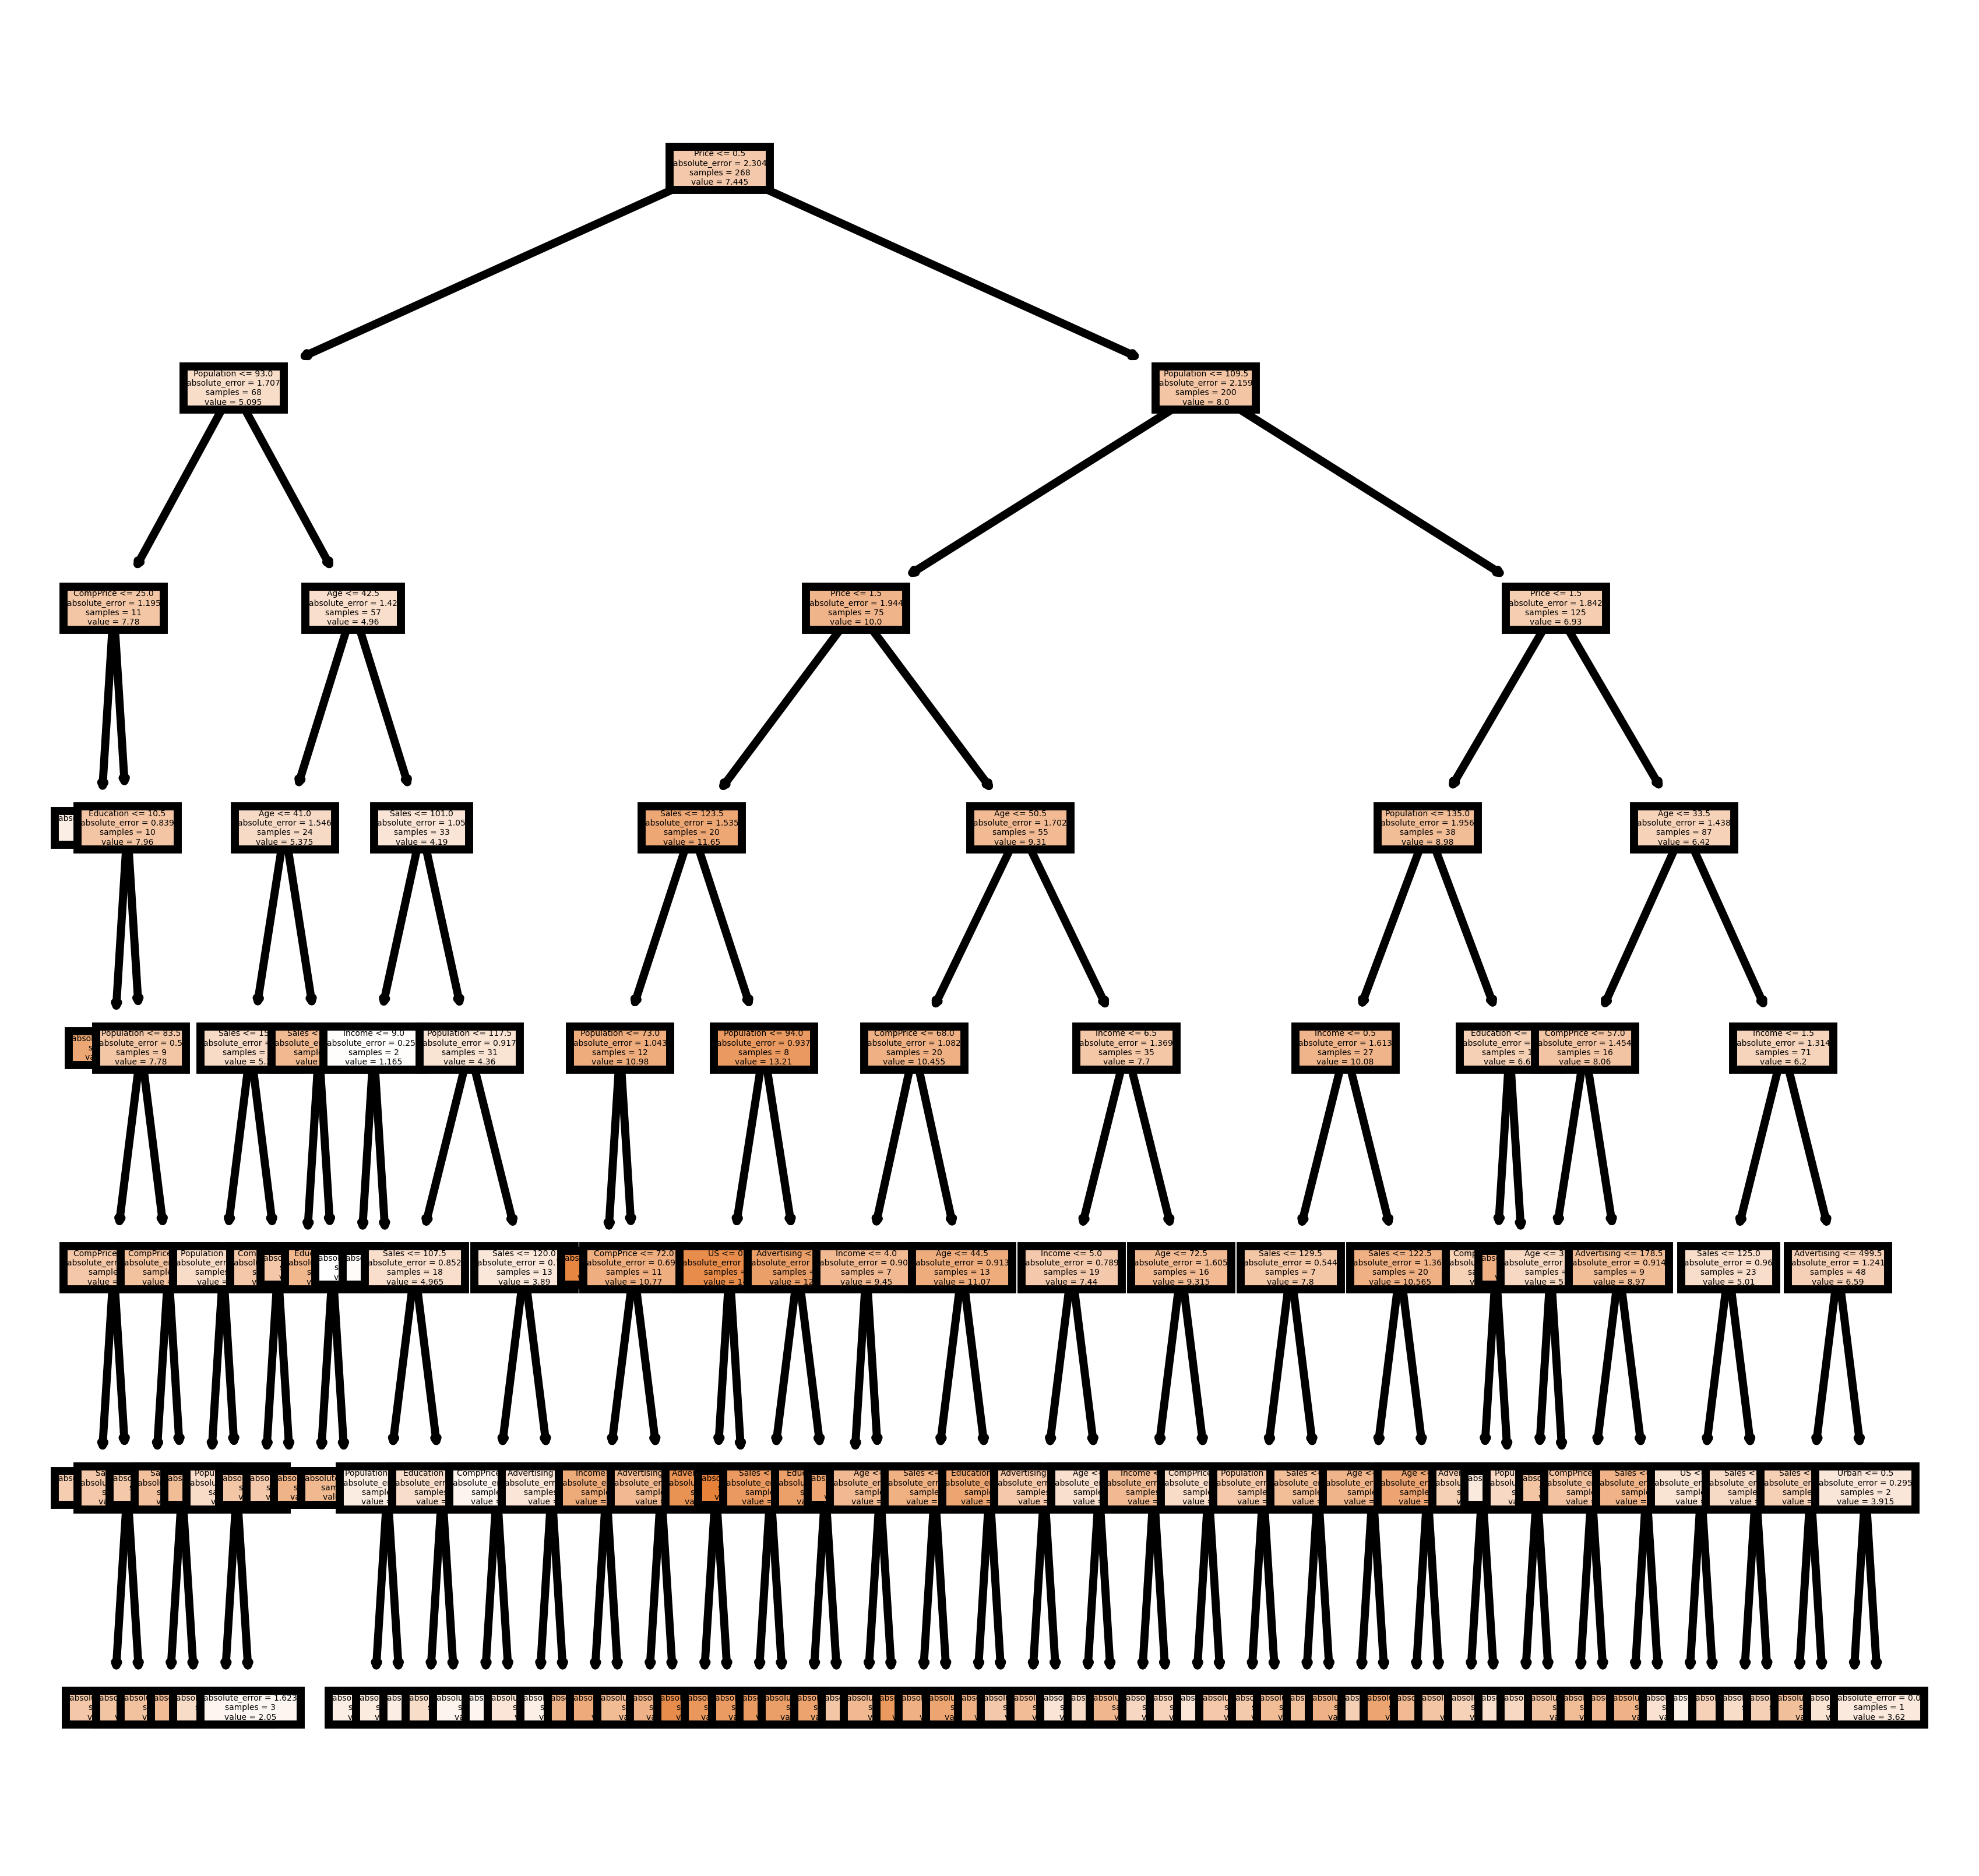

In [22]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(
    model,
    feature_names=fn,
    class_names=cn,
    filled=True,
)
plt.show()

# Pruning

In [41]:
ccp_alphas = model.cost_complexity_pruning_path(x_train, y_train)["ccp_alphas"]

In [42]:
ccp_alphas

array([0.        , 0.00052239, 0.00059701, 0.00104478, 0.00160448,
       0.00164179, 0.00164179, 0.00171642, 0.00179104, 0.00182836,
       0.00190299, 0.00220149, 0.00220149, 0.00238806, 0.00279851,
       0.00298507, 0.00309701, 0.00343284, 0.00376866, 0.00391791,
       0.00391791, 0.00432836, 0.00455224, 0.00462687, 0.00481343,
       0.00503731, 0.00511194, 0.00552239, 0.00615672, 0.00623134,
       0.00679104, 0.00746269, 0.00876866, 0.00895522, 0.00955224,
       0.00988806, 0.01007463, 0.01074627, 0.01089552, 0.01141791,
       0.01152985, 0.01164179, 0.01179104, 0.0118097 , 0.01182836,
       0.01272388, 0.01291045, 0.01432836, 0.01451493, 0.01470149,
       0.01552239, 0.01565299, 0.01626866, 0.01649254, 0.01776119,
       0.01798507, 0.01798507, 0.01813433, 0.01929104, 0.02063433,
       0.02130597, 0.0213806 , 0.0230597 , 0.02708955, 0.03302239,
       0.03384328, 0.03429104, 0.03759328, 0.03985075, 0.04664179,
       0.06406716, 0.0819403 , 0.08492537, 0.11488806, 0.20817

In [43]:
ccp_alpha_grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(criterion='absolute_error', max_depth = 6, max_features = 'auto', splitter = 'best'),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]}),
)
ccp_alpha_grid_search.fit(x_train, y_train)
ccp_alpha_grid_search.best_params_

{'ccp_alpha': 0.0}

In [44]:
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_

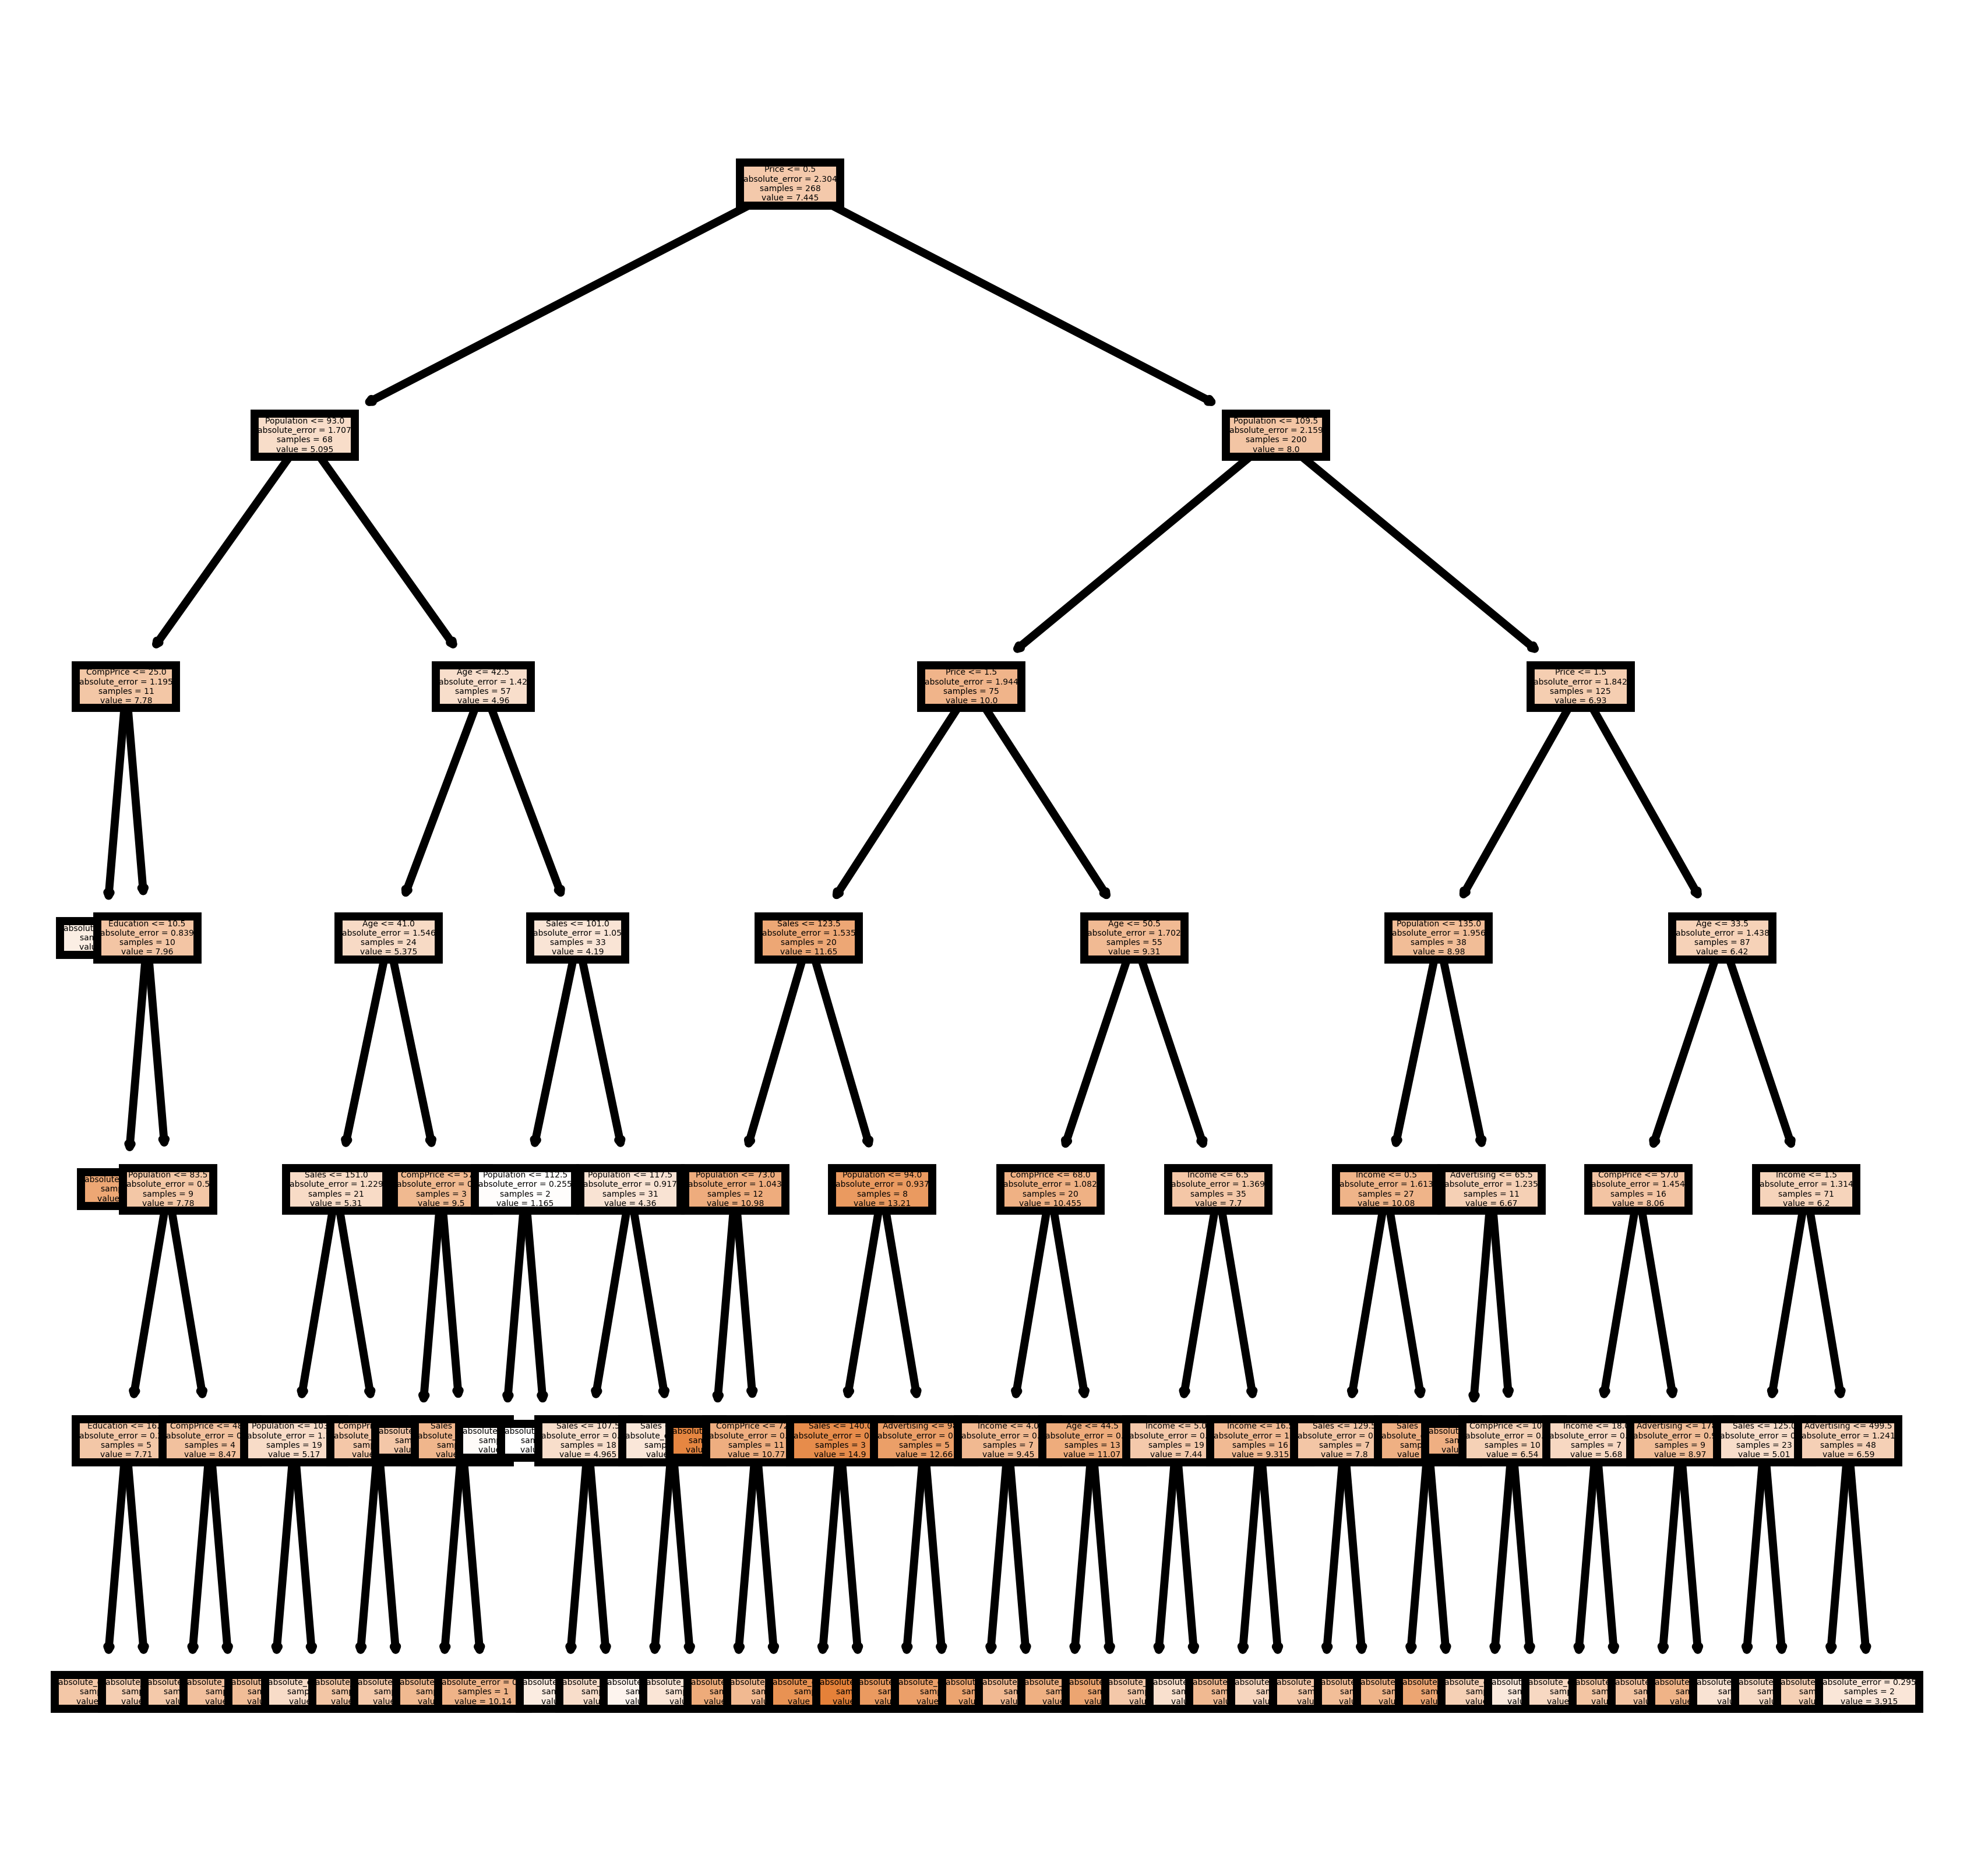

In [45]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(
    best_ccp_alpha_tree,
    feature_names=fn,
    class_names=cn,
    filled=True,
)
plt.show()

In [46]:
best_ccp_alpha_tree.score(x_test,y_test)

0.24309353691477542

# As the decision tree regressor is providing us with substandard accuracy we can try XGBoost or ADABoost or other complex algorithms on this dataset.